## TEXT MINING AND SENTIMENT ANALYSIS EXAM

### Q1
Scrape this medium article (https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b) and create a word cloud to visualize frequently used words 
(Note: Select all paragraphs and join them together as a single string and pass it to python word cloud package)


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from selenium import webdriver

In [62]:
url='https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b'
browser=webdriver.Chrome('chromedriver.exe')
browser.get(url)

In [63]:
parent_tags = browser.find_elements_by_css_selector('div')
para_tags = browser.find_elements_by_css_selector('div.section-content')
len(para_tags)

6

In [64]:
import bs4
sentences=''
for para in para_tags:
    para_text=para.get_attribute('innerHTML')
    sentences=sentences+' '+para_text
    sentences=bs4.BeautifulSoup(sentences,'html.parser').text
    

In [65]:
sentences

' Data Science and Machine Learning Interview QuestionsGeorge SeifBlockedUnblockFollowFollowingApr 25, 2018Ah the dreaded machine learning interview. You feel like you know everything… until you’re tested on it! But it doesn’t have to be this way.Over the past few months I’ve interviewed with many companies for entry-level roles involving Data Science and Machine Learning. To give you a bit of perspective, I was in graduate school in the last few months of my masters in machine learning and computer vision with most of my previous experience being research/academic, but with 8 months at an early stage startup (unrelated to ML). The roles included work in Data Science, general Machine Learning, and specializations in Natural Language Processing or Computer Vision. I interviewed with big companies like Amazon, Tesla, Samsung, Uber, Huawei, but also with many startups ranging from early-stage to well established and funded.Today I’m going to share with you all of the interview questions I

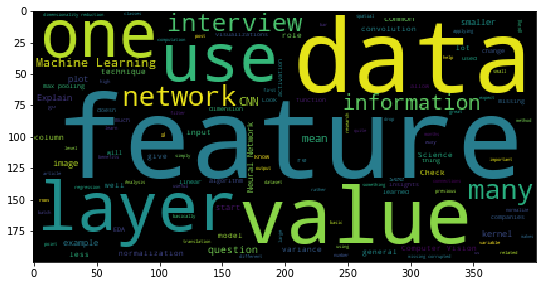

In [66]:
from wordcloud import WordCloud
wc=WordCloud().generate(sentences)
plt.figure(figsize=(9,9))
plt.imshow(wc)
plt.show()

### Q2
Using amazon reviews data set do the following

a.	create a corpus using sklearn package. 

b.	Create the Document Term Matrix using unigrams

c.	Identify top 25 unigrams and filter their respective columns from DTM

d.	Using these 25 columns, compute correlation matrix (if possible visualize the same using seaborn heatmap function). 

e.	Using correlation matrix, Identify the pair of unigrams which has the highest correlation value


In [19]:
pwd()

'C:\\Users\\HAAMEEM'

In [20]:
df=pd.read_csv('amazon_reviews.csv')

In [21]:
df.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [22]:
df.shape

(999, 10)

In [24]:
docs = df['reviewText'].fillna('').str.lower().str.replace('[^a-z ]', '')
docs.head()

0    we got this gps for my husband who is an otr o...
1    im a professional otr truck driver and i bough...
2    well what can i say  ive had this unit in my t...
3    not going to write a long review even thought ...
4    ive had mine for a year and heres what we got ...
Name: reviewText, dtype: object

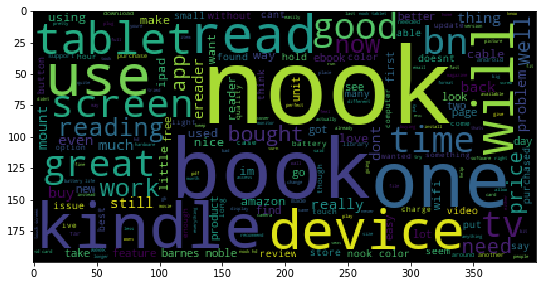

In [34]:
from wordcloud import WordCloud
wc=WordCloud().generate(' '.join(docs))
plt.figure(figsize=(9,9))
plt.imshow(wc)
plt.show()

#### create a corpus using sklearn package. 

In [31]:
stop_words=nltk.corpus.stopwords.words('english')
print('number of stop words = ',len(stop_words))

len(stop_words)
def clean_text(row):
    row_words=row.split(' ')
    clean_words=[word for word in row_words if word not in stop_words]
    return ' '.join(clean_words)

docs_clean=docs.apply(clean_text)
docs_clean.head(1)

number of stop words =  179


0    got gps husband otr road trucker  impressed sh...
Name: reviewText, dtype: object

In [35]:
len(docs_clean)

999

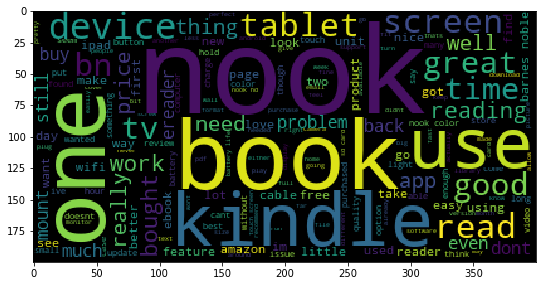

In [33]:
from wordcloud import WordCloud
wc=WordCloud().generate(' '.join(docs_clean))
plt.figure(figsize=(9,9))
plt.imshow(wc)
plt.show()

#### Create the Document Term Matrix using unigrams

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
sparse_matrix = cv.fit_transform(docs_clean)
numpy_matrix = sparse_matrix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns=cv.get_feature_names())
df_dtm.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Identify top 25 unigrams and filter their respective columns from DTM

In [38]:
a=df_dtm.sum().sort_values(ascending=False)
top_columns=pd.DataFrame(a)

In [41]:
top_columns.head()

,0
nook,1454
books,605
kindle,566
one,543
screen,475


In [109]:
top_25_columns=top_columns[0:25]


In [110]:
dtm_25=df_dtm[top_25_columns.index]

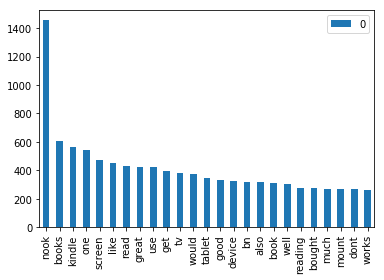

In [39]:
top_columns=top_columns[0:25]
top_columns.plot(kind='bar')

#### Using these 25 columns, compute correlation matrix (if possible visualize the same using seaborn heatmap function). 

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = pd.DataFrame(cosine_similarity(df_dtm.T),
                       index=df_dtm.columns,
                       columns=df_dtm.columns)
cos_sim.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
aaa,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
aac,0.0,1.0,0.0,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
abandoning,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
abilities,0.0,0.5,0.0,1.000000,0.051848,0.032616,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.387298,0.00000,0.0,0.000000
ability,0.0,0.0,0.0,0.051848,1.000000,0.202930,0.103695,0.0,0.0,0.0,...,0.0,0.119737,0.0,0.20739,0.0,0.0,0.133870,0.20739,0.0,0.073324


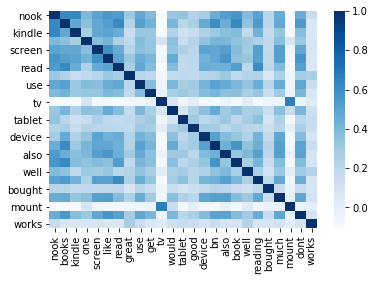

In [44]:
frequent_words = df_dtm.sum().sort_values(ascending=False).head(25).index
words_correlation = df_dtm[frequent_words].corr()
import seaborn as sns
sns.heatmap(words_correlation, cmap='Blues')

#### Using correlation matrix, Identify the pair of unigrams which has the highest correlation value

In [52]:
sort_corr = words_correlation.unstack()
sorted_c = sort_corr.sort_values(kind="quicksort",ascending=False)

In [53]:
sorted_c=pd.DataFrame(sorted_c)

In [55]:
# Highest values are correlation value with its self but we dont need this
sorted_c.head()

,,0
works,works,1.0
would,would,1.0
much,much,1.0
bought,bought,1.0
reading,reading,1.0


In [59]:
sorted_c[25:].head(25)

0
tv      mount    0.670188
mount   tv       0.670188
nook    kindle   0.635081
kindle  nook     0.635081
books   book     0.626593
book    books    0.626593
nook    books    0.624179
books   nook     0.624179
        read     0.620132
read    books    0.620132
        reading  0.609250
reading read     0.609250
books   bn       0.608864
bn      books    0.608864
like    screen   0.586531
screen  like     0.586531
book    bn       0.573660
bn      book     0.573660
dont    like     0.571027
like    dont     0.571027
        also     0.567326
also    like     0.567326
book    nook     0.567272
nook    book     0.567272
        like     0.561598

Q3.	Using the above Document Term Matrix

a.	Use K-means clustering to cluster the reviews in to four groups

b.	Plot a bar chart to display no. of documents under each group

c.	Create Word cloud for each group


####  Use K-means clustering to cluster the reviews in to four groups


In [85]:
from sklearn.cluster import KMeans

#### Making model on 9440 columns

In [86]:
model_cluster= KMeans(n_clusters = 4, max_iter=50)
model_cluster.fit(df_dtm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [87]:
df_dtm['ClusterID']=model_cluster.labels_

In [88]:
df_dtm.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune,ClusterID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [89]:
df_dtm['ClusterID'].value_counts()

2    836
0    132
1     29
3      2
Name: ClusterID, dtype: int64

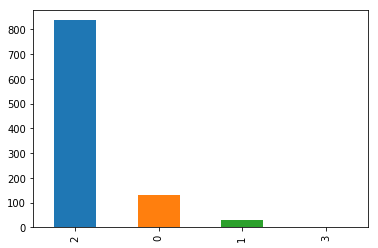

In [90]:
df_dtm['ClusterID'].value_counts().plot(kind='bar')

In [79]:

df_dtm_0=df_dtm[df_dtm['ClusterID']==0]
print(df_dtm_0.shape)

df_dtm_1=df_dtm[df_dtm['ClusterID']==1]
print(df_dtm_1.shape)


df_dtm_2=df_dtm[df_dtm['ClusterID']==2]
print(df_dtm_2.shape)


df_dtm_3=df_dtm[df_dtm['ClusterID']==3]
print(df_dtm_3.shape)

(846, 9440)
(127, 9440)
(24, 9440)
(2, 9440)


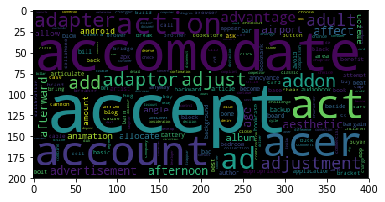

In [91]:
wc0 = WordCloud().generate(' '.join(df_dtm_0))
plt.imshow(wc0)

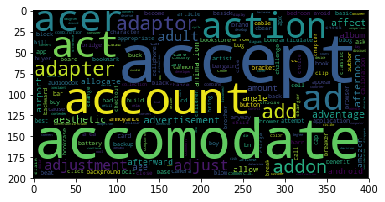

In [92]:
wc1 = WordCloud().generate(' '.join(df_dtm_1))
plt.imshow(wc1)

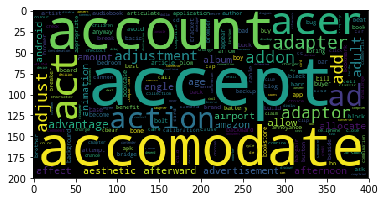

In [93]:
wc2 = WordCloud().generate(' '.join(df_dtm_2))
plt.imshow(wc2)

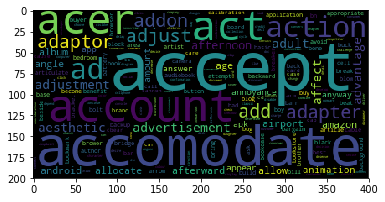

In [94]:
wc3 = WordCloud().generate(' '.join(df_dtm_3))
plt.imshow(wc3)

### Intially we made cluster with 9440 columns which is not an ideal way as we need limited number of columns so we make another cluster based on our top 25 words which is ideally suitable for this task

#### Cluster modelling on top 25 words

In [111]:
model_cluster2= KMeans(n_clusters = 4, max_iter=50)
model_cluster2.fit(dtm_25)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [112]:
dtm_25['ClusterID']=model_cluster2.labels_

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
dtm_25['ClusterID'].value_counts()

0    838
3    128
1     20
2     13
Name: ClusterID, dtype: int64

In [116]:
dtm_25.head()

,nook,books,kindle,one,screen,like,read,great,use,get,...,also,book,well,reading,bought,much,mount,dont,works,ClusterID
0,0,0,0,1,1,0,0,2,2,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,5,2,5,0,0,2,1,...,4,0,2,0,0,0,0,1,0,0
3,0,0,0,1,1,1,0,1,0,2,...,2,0,1,0,1,0,0,0,0,0
4,0,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:

dtm_25_0=dtm_25[dtm_25['ClusterID']==0]
print(dtm_25_0.shape)

dtm_25_1=dtm_25[dtm_25['ClusterID']==1]
print(dtm_25_1.shape)


dtm_25_2=dtm_25[dtm_25['ClusterID']==2]
print(dtm_25_2.shape)


dtm_25_3=dtm_25[dtm_25['ClusterID']==3]
print(dtm_25_3.shape)

(838, 26)
(20, 26)
(13, 26)
(128, 26)


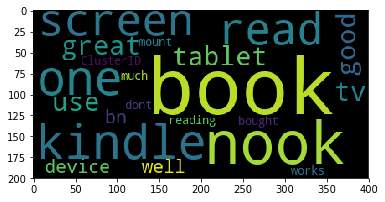

In [118]:
wc4 = WordCloud().generate(' '.join(dtm_25_0))
plt.imshow(wc4)

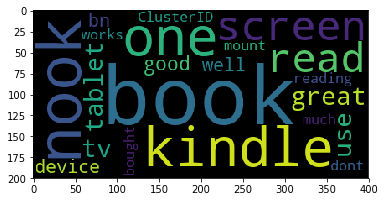

In [119]:
wc5 = WordCloud().generate(' '.join(dtm_25_1))
plt.imshow(wc5)

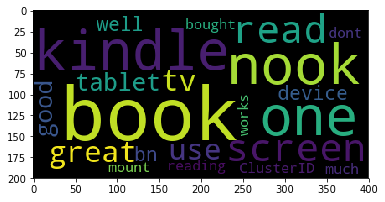

In [120]:
wc6 = WordCloud().generate(' '.join(dtm_25_2))
plt.imshow(wc6)

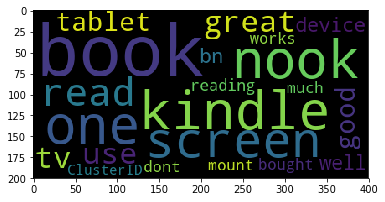

In [121]:
wc7 = WordCloud().generate(' '.join(dtm_25_3))
plt.imshow(wc7)

Q4.	Using imdb movies reviews data set (imdb_sentiment.csv: https://bit.ly/2S2yXEd), create a supervised model to predict the sentiment of user reviews.

a.	Create a word cloud using the user reviews

b.	Use random_state=100 while splitting data in to training (80%) and testing(20%).

c.	Comment if the target variable contains balanced or imbalanced classes (In target variable: 0 = negative, 1 = positive 
sentiment)

d.	Build various supervised classification models using the training data set

e.	Predict and compute accuracy of the model on test data set

f.	Identify which model is best for sentiment prediction


#### Create a word cloud using the user reviews


In [124]:
df2=pd.read_csv('imdb_sentiment.csv')

In [125]:
df2.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


#### Before CLeaning Reviews

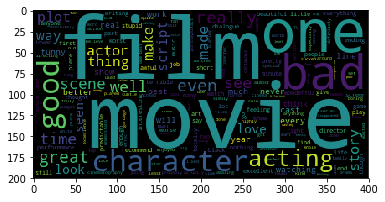

In [127]:
wc6 = WordCloud().generate(' '.join(df2['review']))
plt.imshow(wc6)

#### After Cleaning Reviews

In [128]:
stop_words = nltk.corpus.stopwords.words('english')

# len(stop_words)
junk_words = []

stop_words.extend(junk_words)
len(stop_words)

179

In [129]:
stemmer = nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words = row_text.split(' ')
    #print(row_words)
    row_words = [stemmer.stem(word) for word in row_words \
                 if word not in stop_words]
    #print(row_words)
    #print('-----')
    return ' '.join(row_words)

docs_clean = df2['review'].apply(lambda v: clean_text(v))
docs_clean.head()

0    A very, very, slow-moving, aimless movi distre...
1    not sure lost - flat charact audience, nearli ...
2    attempt arti black & white clever camera angle...
3                   veri littl music anyth speak of.  
4    the best scene movi gerardo tri find song keep...
Name: review, dtype: object

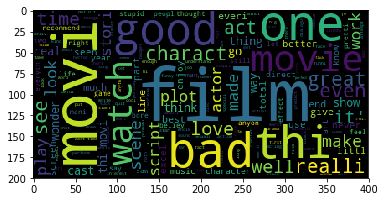

In [130]:
wc6 = WordCloud().generate(' '.join(docs_clean))
plt.imshow(wc6)

#### Use random_state=100 while splitting data in to training (80%) and testing(20%).
#### Build various supervised classification models using the training data set
#### Predict and compute accuracy of the model on test data set
#### Identify which model is best for sentiment prediction


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score

stop_words = nltk.corpus.stopwords.words('english')
stop_words = list(np.setdiff1d(stop_words, ['not']))
junk_words = []

stop_words.extend(junk_words)
stemmer = nltk.PorterStemmer()

docs = df2['review'].fillna('').str.lower().str.replace('[^a-z ]', '')
docs_clean = docs.apply(lambda v: ' '.join([stemmer.stem(word) for word in v.split(' ') \
                                            if word not in stop_words]))

train, test = train_test_split(docs_clean, test_size=0.2, random_state=100)

cv = CountVectorizer()
cv.fit(train)
train_x = cv.transform(train)
test_x = cv.transform(test)

train_y = df2.loc[train.index]['sentiment']
test_y = df2.loc[test.index]['sentiment']

adaboost_model = RandomForestClassifier(n_estimators=300, random_state=100)
adaboost_model.fit(train_x, train_y)
pred_class = adaboost_model.predict(test_x)
ad_bos=accuracy_score(test_y, pred_class)

In [146]:
ad_bos

0.7466666666666667

In [141]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)
pred_class=lr.predict(test_x)
lr_ac=accuracy_score(test_y,pred_class)
print(lr_ac)

0.76


In [143]:
from sklearn.neighbors import KNeighborsClassifier
kr=KNeighborsClassifier()
kr.fit(train_x,train_y)
pred_class=kr.predict(test_x)
kr_ac=accuracy_score(test_y,pred_class)
print(kr_ac)

0.6133333333333333


In [153]:
pd.DataFrame({'model':['KNeighborsClassifier','RandomForest','LogisticRegression'],'accuracy':[kr_ac,ad_bos,lr_ac]})

,model,accuracy
0,KNeighborsClassifier,0.613333
1,RandomForest,0.746667
2,LogisticRegression,0.760000


#### The best model i would prefer is logistic regression based model

#### Comment if the target variable contains balanced or imbalanced classes (In target variable: 0 = negative, 1 = positive sentiment)

In [132]:
print(df2['sentiment'].value_counts())

1    386
0    362
Name: sentiment, dtype: int64


#### No there is no imbalance as target variable of both the classes are more or less close to each other

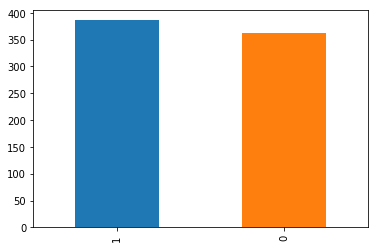

In [133]:
df2['sentiment'].value_counts().plot(kind='bar')

Q5) Identify sentiment for the imdb user reviews using vader package. Comment the performance of supervised vs unsupervised sentiment prediction.

In [155]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
senti=SentimentIntensityAnalyzer()

D:\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


#### We have taken 3 cases of positive, negative and neutral 

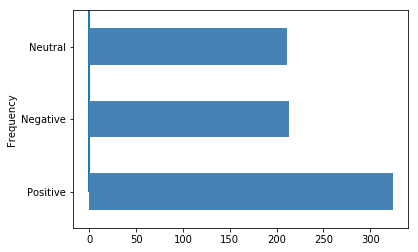

In [159]:
%matplotlib inline
def get_sentiment_score(review):
    compound_score=senti.polarity_scores(review)['compound']
    return compound_score

def get_sentiment(score):
    if score>0.25:
        return 'Positive'
    elif score<-0.25:
        return 'Negative'
    else :
        return 'Neutral'
    

df2['sentiment_scores']=df2['review'].apply(get_sentiment_score)
df2['sentiment_vader']=df2['sentiment_scores'].apply(get_sentiment)
df2['sentiment_scores'].plot.hist()
df2['sentiment_vader'].value_counts().plot.barh(color='steelblue')

#### However to compare we need to take only 2 cases  positive and negative

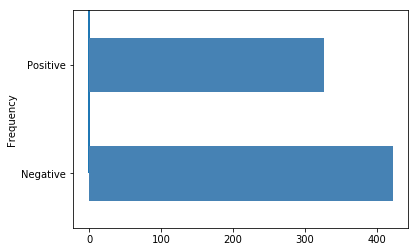

In [160]:
%matplotlib inline
def get_sentiment_score(review):
    compound_score=senti.polarity_scores(review)['compound']
    return compound_score

def get_sentiment(score):
    if score>0.25:
        return 'Positive'
    elif score<0.25:
        return 'Negative'
    else :
        return 'Positive'
    

df2['sentiment_scores']=df2['review'].apply(get_sentiment_score)
df2['sentiment_vader']=df2['sentiment_scores'].apply(get_sentiment)
df2['sentiment_scores'].plot.hist()
df2['sentiment_vader'].value_counts().plot.barh(color='steelblue')

In [161]:
df2.head()

,review,sentiment,sentiment_scores,sentiment_vader
0,"A very, very, very slow-moving, aimless movie ...",0,-0.4215,Negative
1,Not sure who was more lost - the flat characte...,0,-0.5507,Negative
2,Attempting artiness with black & white and cle...,0,-0.7178,Negative
3,Very little music or anything to speak of.,0,0.0000,Negative
4,The best scene in the movie was when Gerardo i...,1,0.6369,Positive


#### Converting these  strings to 1 and 0

In [164]:
df2['sentiment_vader'].replace(['Negative','Positive'],[0,1],inplace=True)

In [165]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(df2['sentiment'],df2['sentiment_vader'])
print(ac)

0.7887700534759359


#### My unsupervised model is better than supervised  as my overall accuracy is pretty good compared to the other

Q6.)	Apply topic modelling to cluster news based on their headlines. Using abcnews.csv (https://github.com/skathirmani/datasets/raw/master/abcnews.csv.zip file, randomly select 10,000 rows. Using multiple iterations, choose appropriate number of topics. Visualize number of documents under each cluster using a bar chart

In [166]:
df3=pd.read_csv('abcnews.csv')

In [167]:
df3.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [168]:
import gensim

D:\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


#### Random Sampling


In [192]:
df_elements = df3.sample(n=10000)

In [193]:
df_elements.head()

,publish_date,headline_text
580628,20101207,rural business confidence takes hit
599406,20110307,hughes reprimanded for swearing
60655,20031211,us to issue tuna warning
972677,20150810,act officially launches second large scale win...
681003,20120319,one person dead in wonnerup crash


In [178]:
df_elements.shape

(10000, 2)

In [194]:
df_elements.shape

(10000, 2)

In [196]:
docs = df_elements['headline_text'].fillna('').str.lower().str.replace('[^a-z ]', '')
docs.head()

580628                  rural business confidence takes hit
599406                      hughes reprimanded for swearing
60655                              us to issue tuna warning
972677    act officially launches second large scale win...
681003                    one person dead in wonnerup crash
Name: headline_text, dtype: object

In [197]:
docs_clean = []
stopwords = nltk.corpus.stopwords.words('english')
junk_words = []

stopwords.extend(junk_words)
for doc in docs:
    row_words = [word for word in doc.split(' ') if word not in stopwords]
    docs_clean.append(row_words)
len(docs_clean)

10000

In [198]:
dictionary = gensim.corpora.Dictionary(docs_clean)

In [199]:
print(dictionary)

Dictionary(12348 unique tokens: ['business', 'confidence', 'hit', 'rural', 'takes']...)


In [207]:
docs_bow = [dictionary.doc2bow(doc) for doc in docs_clean]

In [242]:
ldamodel = gensim.models.LdaModel(docs_bow, id2word=dictionary, num_topics=2)
ldamodel

In [243]:
ldamodel.print_topics()

[(0,
  '0.015*"" + 0.004*"man" + 0.003*"says" + 0.003*"interview" + 0.003*"us" + 0.003*"new" + 0.002*"court" + 0.002*"wins" + 0.002*"accused" + 0.002*"crash"'),
 (1,
  '0.011*"police" + 0.005*"new" + 0.005*"govt" + 0.003*"" + 0.003*"council" + 0.003*"man" + 0.003*"health" + 0.003*"water" + 0.003*"missing" + 0.003*"fire"')]

In [244]:
ldamodel = gensim.models.LdaModel(docs_bow, id2word=dictionary, num_topics=3)
ldamodel

In [245]:
ldamodel.print_topics()

[(0,
  '0.011*"" + 0.005*"police" + 0.005*"interview" + 0.004*"wa" + 0.004*"govt" + 0.004*"qld" + 0.004*"crash" + 0.003*"car" + 0.003*"rural" + 0.003*"road"'),
 (1,
  '0.015*"" + 0.010*"new" + 0.006*"man" + 0.006*"us" + 0.004*"nsw" + 0.003*"says" + 0.003*"home" + 0.003*"world" + 0.003*"water" + 0.003*"council"'),
 (2,
  '0.010*"police" + 0.004*"plan" + 0.003*"hospital" + 0.003*"missing" + 0.003*"two" + 0.003*"council" + 0.003*"says" + 0.003*"health" + 0.003*"win" + 0.003*"day"')]

### Finally we choose number of topic = 4 however strictly speaking we should choose in on the basis of coherence values

In [246]:
ldamodel = gensim.models.LdaModel(docs_bow, id2word=dictionary, num_topics=4)
ldamodel

In [247]:
ldamodel.print_topics()

[(0,
  '0.008*"man" + 0.007*"interview" + 0.006*"death" + 0.005*"police" + 0.004*"government" + 0.004*"new" + 0.004*"" + 0.003*"charged" + 0.003*"public" + 0.003*"dead"'),
 (1,
  '0.029*"" + 0.006*"us" + 0.005*"wa" + 0.005*"govt" + 0.005*"plan" + 0.004*"man" + 0.004*"country" + 0.004*"iraq" + 0.004*"back" + 0.004*"national"'),
 (2,
  '0.007*"says" + 0.005*"new" + 0.005*"woman" + 0.004*"council" + 0.004*"water" + 0.004*"world" + 0.003*"report" + 0.003*"plans" + 0.003*"fire" + 0.003*"warns"'),
 (3,
  '0.016*"police" + 0.005*"new" + 0.005*"australian" + 0.004*"road" + 0.004*"probe" + 0.003*"north" + 0.003*"nsw" + 0.003*"sydney" + 0.003*"west" + 0.003*"trial"')]

In [212]:
pd.DataFrame(ldamodel.get_document_topics(docs_bow[9999]),
            columns=['topic', 'prob']).sort_values(
    'prob').tail(1)['topic'].values[0]

3

In [213]:
topics=[]
for doc_bow in docs_bow:
    topic=pd.DataFrame(ldamodel.get_document_topics(doc_bow),columns=['topic','prob']).sort_values('prob').tail(1)['topic'].values[0]
    topics.append(topic)

In [217]:
topics[:5]

[0, 1, 1, 2, 3]

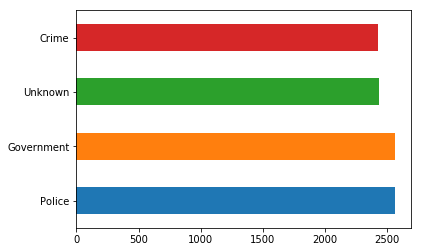

In [221]:
%matplotlib inline
df_elements['topic_number'] = topics
df_elements['topic'] = df_elements['topic_number'].replace({0: 'Unknown', 1: 'Crime',
                                                  2: 'Police', 3: 'Government'})
df_elements['topic'].value_counts().plot.barh()

In [234]:
ldamodel.get_topic_terms(0)


[(1346, 0.006106171),
 (260, 0.0059293825),
 (83, 0.0040413877),
 (1326, 0.003831528),
 (255, 0.0037096653),
 (1447, 0.0034000378),
 (1706, 0.0033230528),
 (273, 0.0030932291),
 (378, 0.002928313),
 (21, 0.0027389335)]

In [235]:
df_topic2word = pd.DataFrame()
for topic_number in range(4):
    df = pd.DataFrame(ldamodel.get_topic_terms(topic_number),
                     columns=['wordid', 'prob'])
    df['word'] = df['wordid'].apply(lambda v: dictionary[v])
    df['topic'] = topic_number
    df_topic2word = df_topic2word.append(df, ignore_index=True)
#df_topic2word

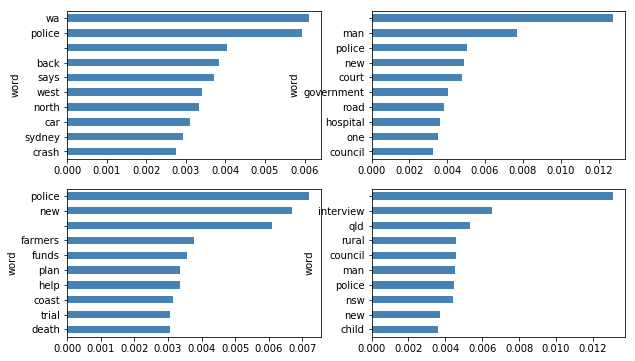

In [236]:
import matplotlib.pyplot as plt
df_topic2word.index = df_topic2word['word']
fig, axs = plt.subplots(2,2)
df_topic2word[df_topic2word['topic']==0]['prob'][::-1].plot.barh(
    color='steelblue', ax=axs[0,0], figsize=(10,6))
df_topic2word[df_topic2word['topic']==1]['prob'][::-1].plot.barh(
    color='steelblue', ax=axs[0,1])
df_topic2word[df_topic2word['topic']==2]['prob'][::-1].plot.barh(
    color='steelblue', ax=axs[1,0])
df_topic2word[df_topic2word['topic']==3]['prob'][::-1].plot.barh(
    color='steelblue', ax=axs[1,1])